# ML - K Means Clustering
Clustering is a machine learning technique that groups similar items together.

- It puts similar data points in the same group (called a cluster).
- It helps find patterns or structure in data without labels (unsupervised learning).

K-Means is a popular clustering algorithm that groups data into K number of clusters based on similarity.

##Example:

If you have data about people's heights and weights, K-Means can group them into 3 clusters:

- Short & light
- Medium height & weight
- Tall & heavy

In [213]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [214]:
# Loading Dataset
df = pd.read_csv('Mall_Customers.csv')


## 1. Data Exploration

In [215]:
# Checking the first 7 rows of Dataset
df.head(7)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [216]:
# Checking last 5 rows of the Dataset
df.tail(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [217]:
# Checking all the column names
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [218]:
# Checking total rows and columns in our data
df.shape


(200, 5)

In [219]:
# Checkimg the total non - null values and the columns datatype in our dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 2. Statistical Analysis

In [220]:
# Checking all the important Stats
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 3. Handling Null Values

In [221]:
# Checking total null values in each column
df.isnull().sum()

# This dataset has 0 null values

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## 4. 2D Clustering of Age and Spending Score

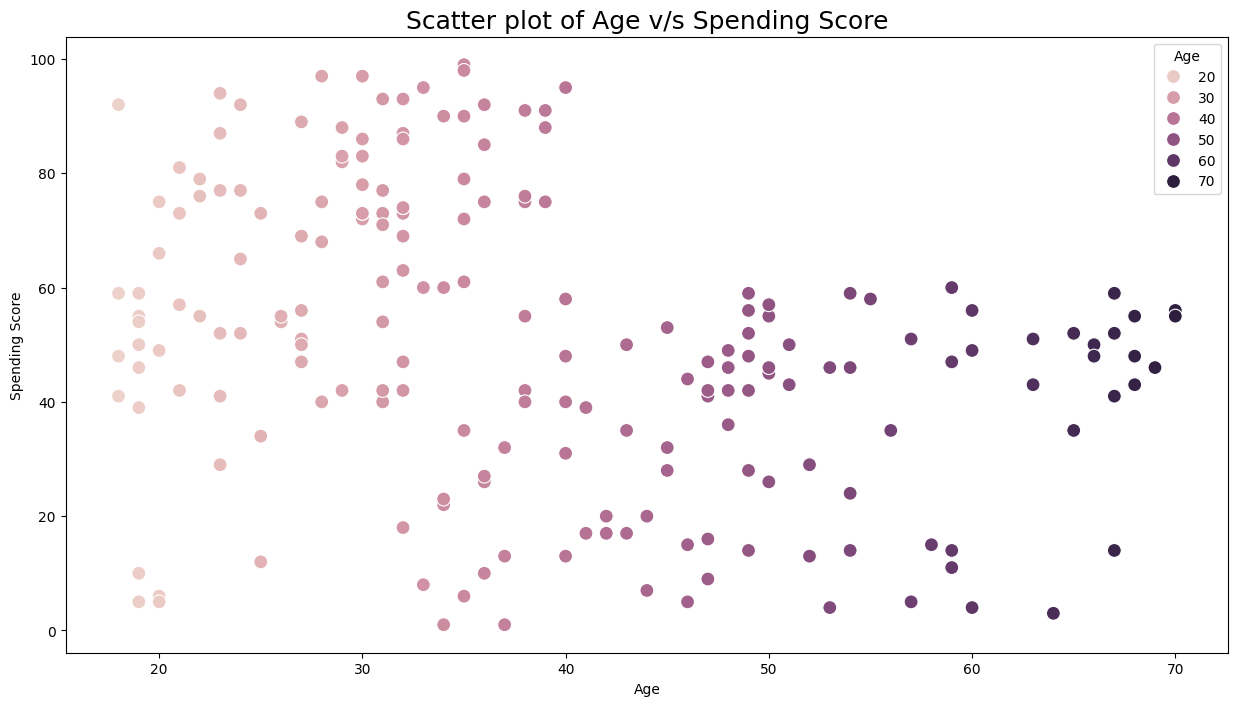

In [222]:
# Making a scatter plot for age and spending score
# Decidingthe figure size
plt.figure(figsize = (15, 8))
sns.scatterplot(df, x='Age', y= 'Spending Score (1-100)', hue = 'Age', s=100)

# Deciding Title and labels
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 18)
plt.ylabel('Spending Score')

# Showing scatter plot
plt.show()


## 5. Deciding K Value
We will try to find the best number of clusters for KMeans Clustering using inertia.
- Lower inertia means the points in a group are closer to each other (which is good).

In [223]:
X1 = df[['Age', 'Spending Score (1-100)']].iloc[ : , : ].values

# This creates an empty list to store the inertia values (we’ll fill it soon).
inertia = []

for n in range(1, 15):
  algorithm = KMeans( n_clusters = n, random_state = 42)
  algorithm.fit(X1)

  # This saves the inertia (how tight the clusters are) into the list.
  inertia.append(algorithm.inertia_)


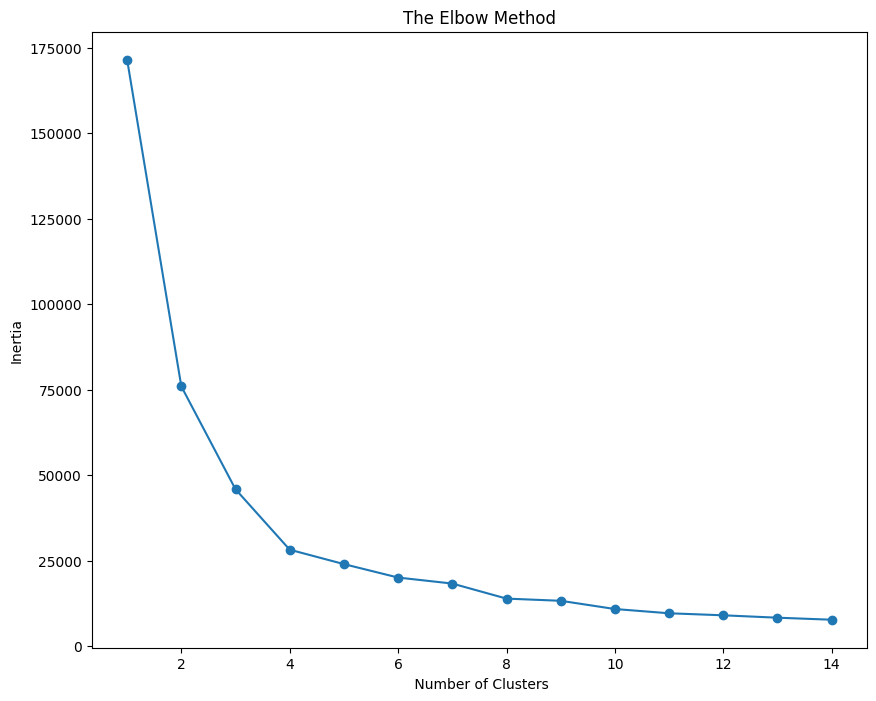

In [224]:
# Deciding the size of the figure
plt.figure(figsize = (10, 8))

# It makes a chart that shows: - On the x-axis → the number of clusters (from 1 to 14)
# On the y-axis → the inertia (how good the clustering is)
plt.plot(np.arange(1, 15), inertia, marker = 'o')

# Deciding the title and labels
plt.title('The Elbow Method')
plt.xlabel(' Number of Clusters')
plt.ylabel('Inertia')

# Showing the plot
plt.show()


In [225]:
for k in range(2, 7):
  algorithm = KMeans(n_clusters = k, random_state = 42)
  algorithm.fit(X1) # Corrected: fit with the data X1
  labels = algorithm.labels_ # Get the labels after fitting

  print(f"Silhouette score for k={k}: {silhouette_score(X1, labels):.2f}")

# So we will choose 4, it's nearest to 1


Silhouette score for k=2: 0.47
Silhouette score for k=3: 0.45
Silhouette score for k=4: 0.50
Silhouette score for k=5: 0.45
Silhouette score for k=6: 0.40


## 6. Applying K Means for K = 4

In [226]:
# Now we will begiving our model 4 clusters
# tol=0.0001 → This is how precise the algorithm should be before it stops.
# (Small value = keep working until the change is tiny.)
# random_state=111 → Keeps the result the same every time you run it (for consistency).
algorithm = (KMeans (n_clusters = 4, tol = 0.0001, random_state = 111))
algorithm.fit(X1)

# After clustering, the model gives each data point a label: 0, 1 or 3, depending on which (cluster) it belongs to.
labels1 = algorithm.labels_

# Centroid gives the center point of each cluster.
centroids1 = algorithm.cluster_centers_


## 7. 2D Grid Of Coordinates

In [227]:
# Creating grid-like coordinate values using two simple lists.
x = np.arange(0, 4)
y = np.arange(0, 3)

# It creates a grid of all possible (x, y) pairs. So for each y row, it repeats the full x list.
# And for each x column, it repeats the full y list.
# xx will contain the x-coordinates repeated for each row of y,
# and yy will contain the y-coordinates repeated for each column of x.
xx, yy = np.meshgrid(x, y)

# Printing their values
print("X:\n ", xx)
print("Y:\n ", yy)


X:
  [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
Y:
  [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]


## 8. Visualization

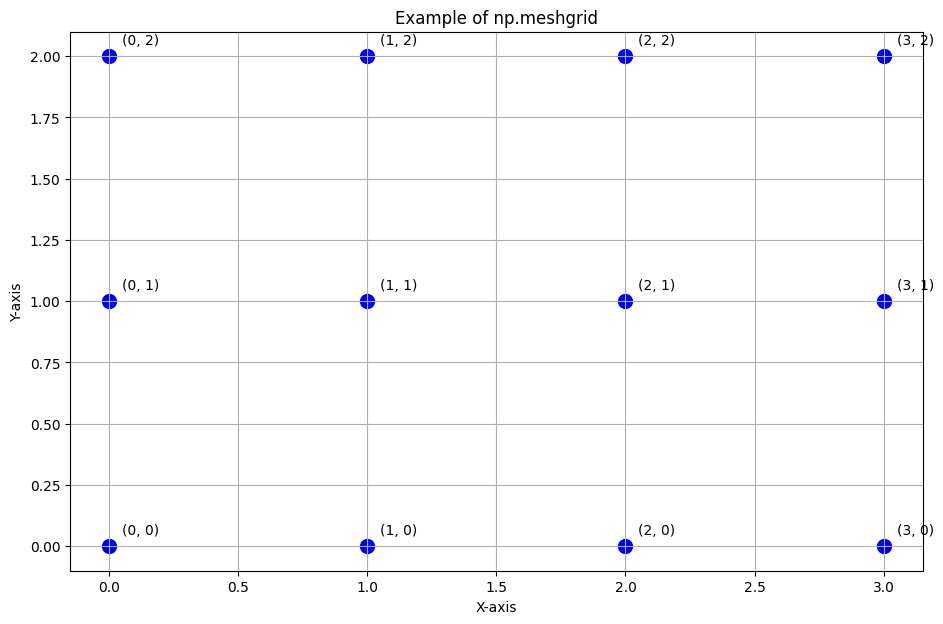

In [228]:
# Deciding the figure size
plt.figure(figsize = (11, 7))

# Making a scatter plot
plt.scatter(xx, yy, c= 'blue', s=100)

# This code is going through every point on a grid and writing the (x, y) label at that point using plt.text().
# Adding 0.05 moves the text a little bit above the point.
for i in range(xx.shape[0]):                     # xx.shape[0] = number of rows
  for j in range(xx.shape[1]):                   # xx.shape[1] = number of columns
    plt.text(xx[i,j] + 0.05, yy[i,j] + 0.05,  f"({xx[i,j]}, {yy[i,j]})")

# Deciding the title and label names
plt.title("Example of np.meshgrid")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Adding grid lines
plt.grid(True)

# Showing plot
plt.show()


In [229]:
# Drawing a colored map behind your data points that shows which region is predicted as which cluster.
# This means the grid has (tiny steps between points). Smaller h = smoother and nicer-looking plot, but slower.
h = 0.02

# Find the min and max values of feature 1 (Age) and feature 2 (Spending Score)
# Subtract 1 and add 1 so there is extra margin around the plotted area.
# X1[:, 0] is the Age column, X1[:, 1] is the Spending Score column.
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() +1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() +1

# Creating a grid of (x, y) points
# np.meshgrid creates a 2D grid of x and y coordinates
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [230]:
# Predicting the cluster for each dot
# xx.ravel() and yy.ravel() turn the 2D grid into a long list of x and y
# np.c_[] joins arrays (or columns) side by side.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

# So Z now holds the cluster number for each tiny dot on the grid.

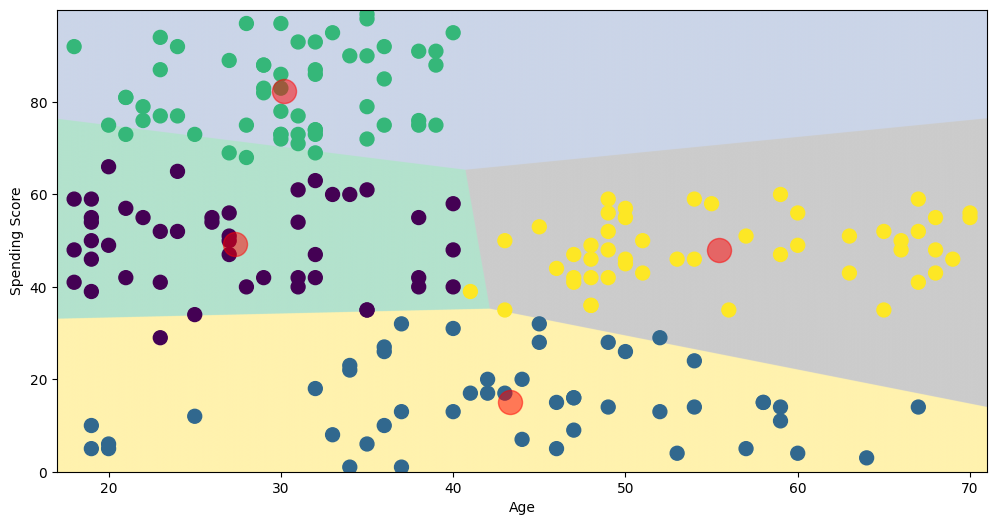

In [231]:
plt.figure(figsize=(12,6))

# Reshape predictions to match the grid shape
Z = Z.reshape(xx.shape)

# Show colored background for clusters
# extent=(...): tells where to draw the image (x and y range)
plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='Pastel2', aspect='auto')

# Show data points, colored by cluster label
plt.scatter(x='Age', y='Spending Score (1-100)', data = df, c=labels1, s=100)

# Show cluster centers
plt.scatter(centroids1[:,0], centroids1[:,1], c='red', s=300, alpha=0.5)

# Label axes and show plot
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


## 9. Applying K Means for K = 5


In [232]:

algorithm = KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001, random_state= 111 , algorithm='elkan')
algorithm.fit(X1)

labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


In [233]:
h = 0.20

# Find the min and max values of feature 1 (Age) and feature 2 (Spending Score)
# Subtract 1 and add 1 so there is extra margin around the plotted area.
# X1[:, 0] is the Age column, X1[:, 1] is the Spending Score column.
x_min, x_max = X1[: , 0].min() - 1 , X1[: , 0].max() + 1
y_min, y_max = X1[: , 1].min() - 1 , X1[: , 1].max() + 1

# Creating a grid of (x, y) points
# np.meshgrid creates a 2D grid of x and y coordinates
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicting the cluster for each dot
# xx.ravel() and yy.ravel() turn the 2D grid into a long list of x and y
# np.c_[] joins arrays (or columns) side by side.
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])


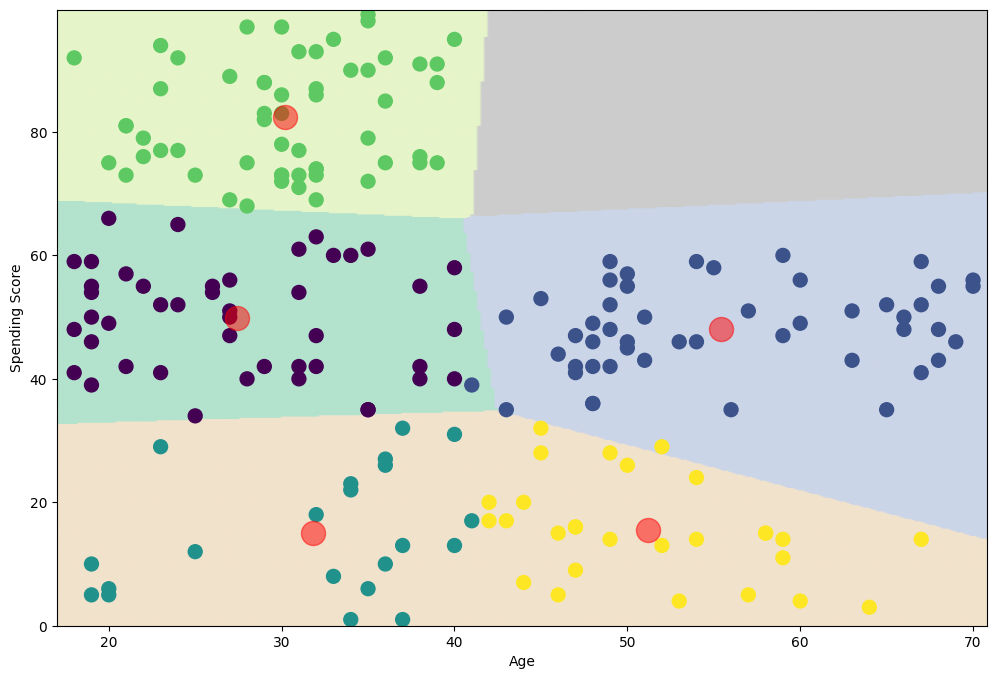

In [234]:
# Seelecting figure size
plt.figure(figsize = (12, 8))

# Reshaping Z
Z = Z.reshape(xx.shape)

# Show colored background for clusters
plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect ='auto', cmap = 'Pastel2')

# Show data points, colored by cluster label
plt.scatter(x='Age', y='Spending Score (1-100)', data = df, c=labels1, s=100)

# Show cluster centers
plt.scatter(centroids1[:,0], centroids1[:,1], c='red', s=300, alpha=0.5)

# Label axes and show plot
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()